In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors,KernelDensity
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.stattools import medcouple

plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
df = pd.read_csv("./outlierDatasets/synthetic.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,outlier
0,0.435518,0.038492,0.551343,0.140049,0.899545,0.588684,0.299706,0.245713,0.367375,0.452970,no
1,0.633197,0.034490,0.319406,0.879141,0.163079,0.184356,0.160583,0.104973,0.294980,0.429709,no
2,0.421558,0.299824,0.602220,0.521654,0.954621,0.547448,0.882898,0.586641,0.840204,0.212529,no
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,yes
4,0.291513,0.474018,0.065267,0.410573,0.903696,0.466520,0.196878,0.165370,0.297764,0.467911,no


In [4]:
X = df.iloc[:, 4:6].values
copy_X = df.iloc[:, 2:4]
y = df.iloc[:, -1:].values

In [5]:
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,10)
testDis = distReturn.reshape(1,-1)
testDis = np.array(testDis)

In [6]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = np.array(arr)

In [15]:
gkde_obj = stats.gaussian_kde(arr)
x_pts = np.linspace(-.01,.95,500)
pdf = gkde_obj.evaluate(x_pts)

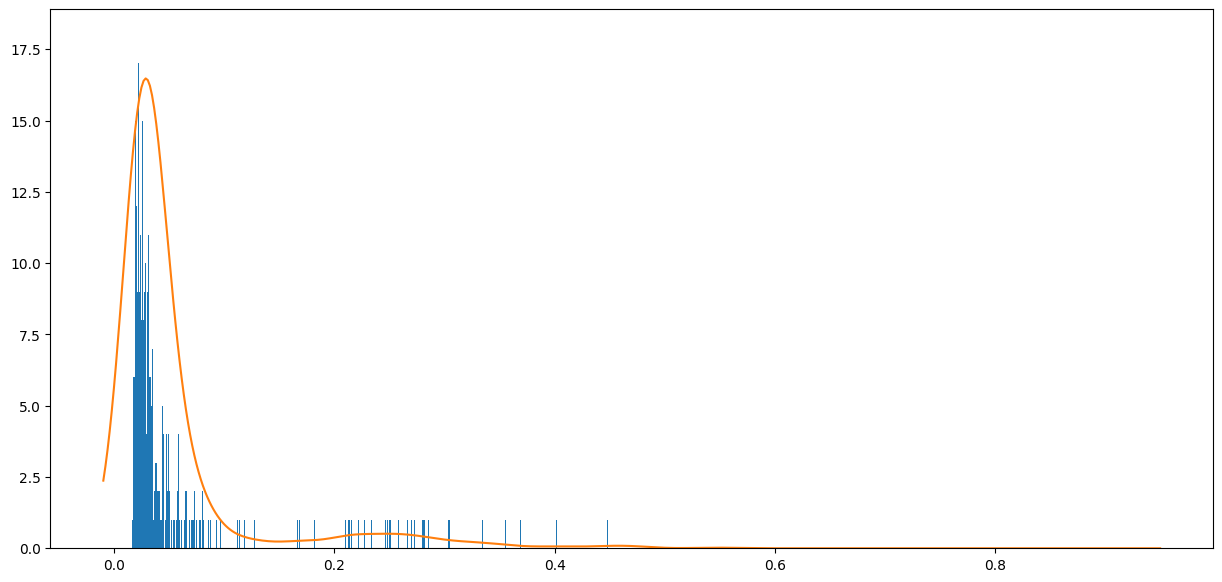

In [8]:
y_normal = stats.norm.pdf(x_pts)
plt.figure()
plt.hist(arr,bins=2000)
plt.plot(x_pts, pdf)